In [1]:
# importing libraries

import pandas as pd
from sklearn.cluster import KMeans
from numpy import std
from statistics import pvariance
import matplotlib.pyplot as plt

In [2]:
# reading dataset and initial information

dataset = pd.read_csv('Data.csv')
dataset = dataset[dataset['Year']==2017]
dataset = dataset.dropna()
parameters = dataset.columns.drop(['Country name', 'Year'])

In [3]:
# detecting outliers

outlier_indexes = []

for item in parameters:
    
    parameter = dataset[item]
    mean = sum(parameter)/len(parameter)
    SD = std(parameter)
    
    try:
        index = parameter[(parameter<=mean-3*SD)].index[0]
        outlier_indexes.append(index)
    except:
        pass
    
    try:
        index = parameter[(parameter>=mean+3*SD)].index[0]
        outlier_indexes.append(index)
    except:
        pass

dataset = dataset.drop(outlier_indexes)

In [4]:
# normalization

for item in parameters:
    
    parameter = dataset[item]
    _max = max(parameter)
    _min = min(parameter)
    dataset[item] = (dataset[item]-_min)/(_max-_min)

In [5]:
# dimention reduction

variance_list = []

for item in parameters:
    
    parameter = dataset[item]
    variance_list.append(pvariance(parameter))

parameter_list = []

for item in parameters:
    
    parameter = dataset[item]
    variance_list.append(pvariance(parameter))
    
    if pvariance(parameter) < (sum(variance_list)/len(variance_list)):
        
        parameter_list.append(item)
        
dataset = dataset.drop(parameter_list, axis=1)

In [6]:
# saving pre-processed dataset

dataset.to_csv('Pre-processed dataset.csv',index = False)

In [7]:
# reading pre-processed dataset

preprocessed_dataset = pd.read_csv('Pre-processed dataset.csv')
parameters = preprocessed_dataset.columns.drop(['Country name', 'Year'])

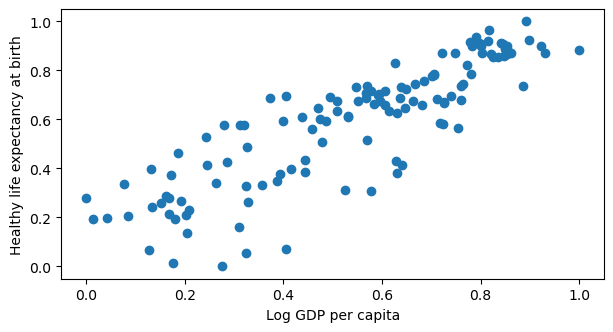

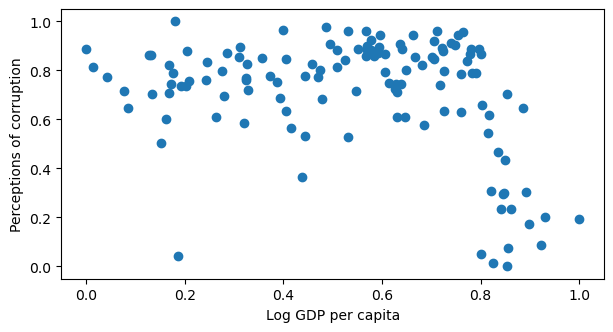

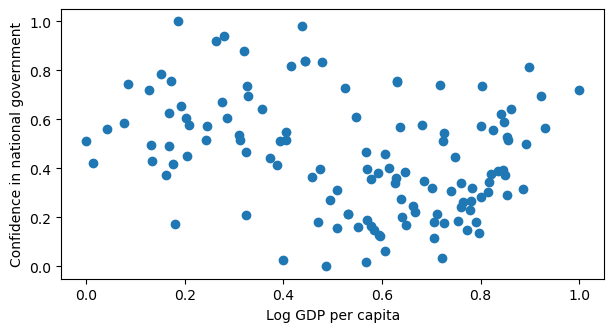

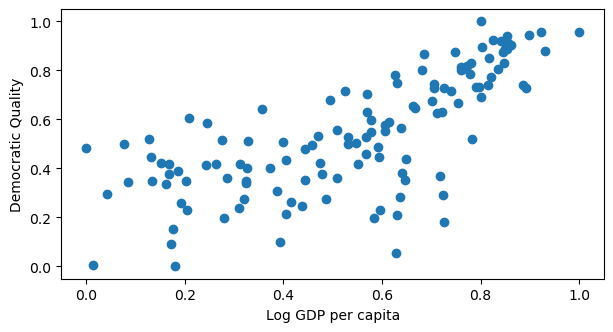

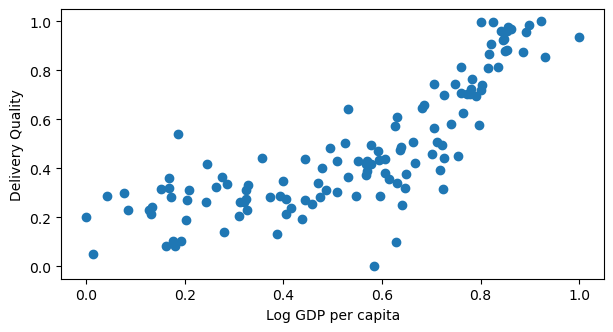

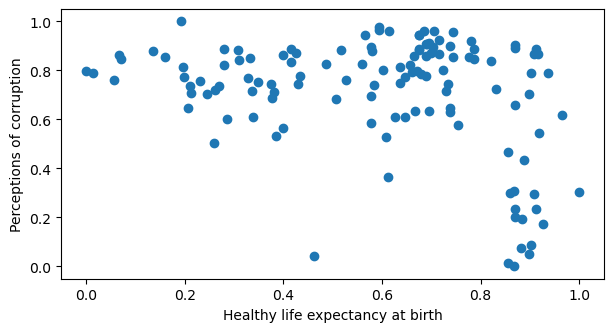

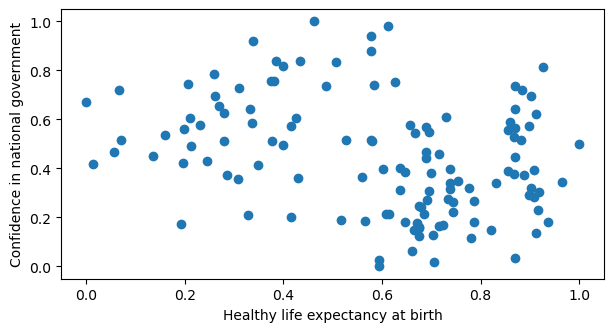

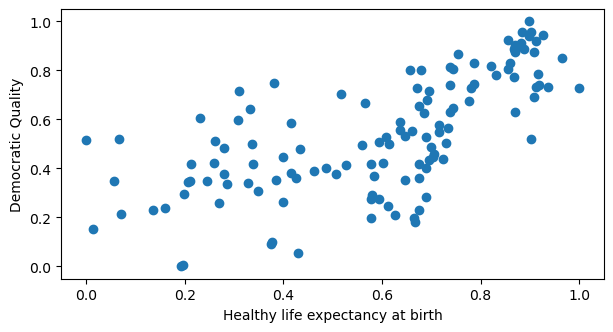

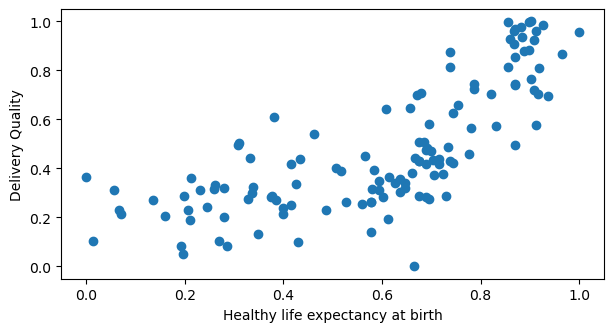

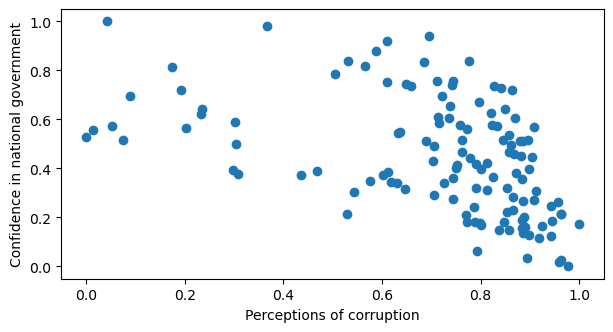

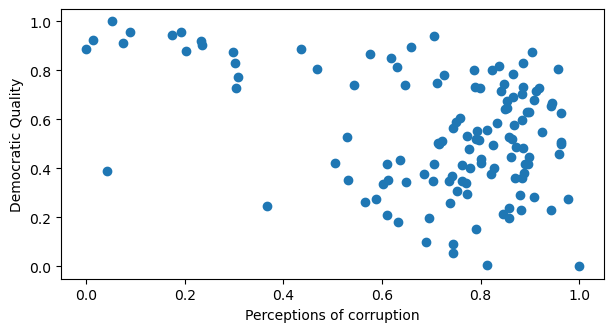

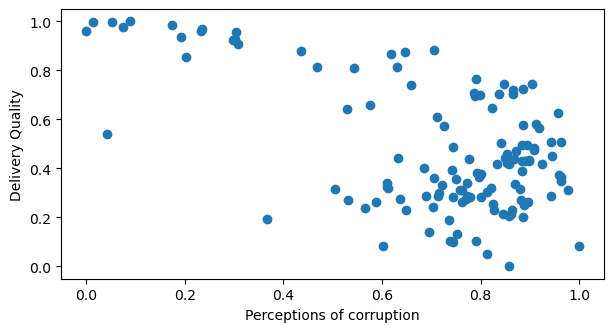

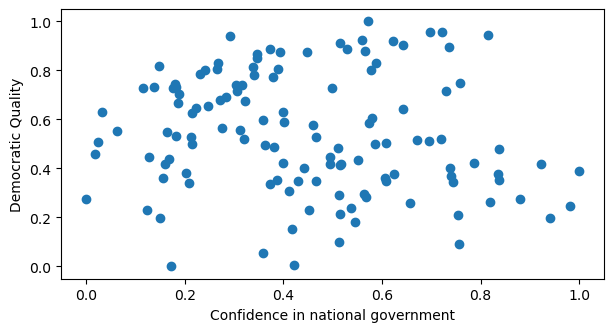

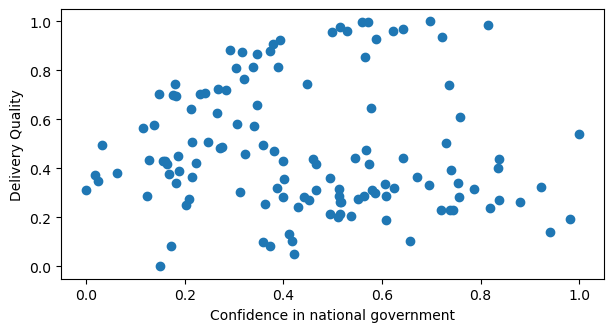

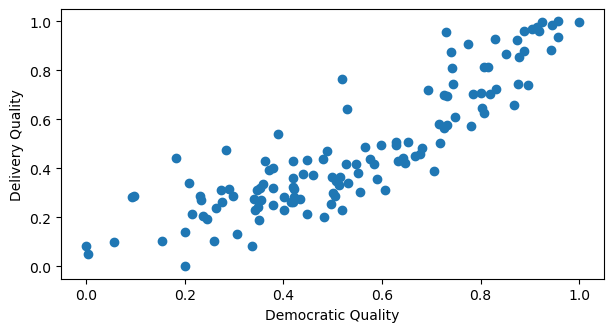

In [8]:
# creating scatter plots

list_plot = []

for col in parameters:
    for row in parameters:
        
        if [row, col] in list_plot or [col, row] in list_plot or col == row:
            
            pass
        
        else:
            
            list_plot.append([row, col])
            plt.figure(figsize=(7, 3.5))
            plt.xlabel(col)
            plt.ylabel(row)
            x = preprocessed_dataset[col]
            y = preprocessed_dataset[row]
            plt.scatter(x, y)
            plt.savefig('Scatter_plots/Scatter_'+col+'_'+row+'.jpeg', dpi=300)

C:\Users\Farbod\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


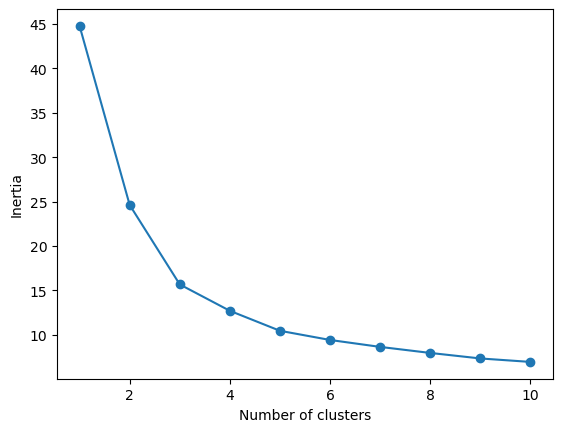

In [9]:
# calculating the intertia for different numbers of clusters

x = list(zip(preprocessed_dataset['Log GDP per capita'], preprocessed_dataset['Healthy life expectancy at birth'],\
         preprocessed_dataset['Perceptions of corruption'], preprocessed_dataset['Confidence in national government'],\
         preprocessed_dataset['Democratic Quality'], preprocessed_dataset['Delivery Quality']))

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

#plt.figure(figsize=(7, 3.5))
plt.plot(range(1,11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('intertia.jpeg', dpi=300)          

In [11]:
# clustering

model = KMeans(n_clusters=6)
model.fit(x)
clusters = pd.DataFrame(list(zip(preprocessed_dataset['Country name'], model.predict(x))))
clusters.columns = ['Country name', 'Cluster']
clusters = preprocessed_dataset.merge(clusters, left_on='Country name', right_on='Country name')
clusters.to_csv('Clusters.csv', index = False)

In [23]:
# calculating mean of variables in each cluster

clusters = pd.read_csv('Clusters.csv')

result = pd.DataFrame()

for item in clusters['Cluster'].drop_duplicates().sort_values(ascending=True):
    
    selected_cluster = clusters[clusters['Cluster'] == item]
    average = pd.DataFrame(selected_cluster[['Log GDP per capita', 'Healthy life expectancy at birth',\
                         'Perceptions of corruption', 'Confidence in national government',\
                         'Democratic Quality', 'Delivery Quality']].mean())
    average.columns = ['Cluster '+' '+str(item)]
    result = pd.concat([result, average.T])

result.to_csv('Average_results.csv')